## Creating Histograms

A histogram basically helps you understand how frequently color values appear in an image. In grayscale image, it generally means you are plotting the frequency of each brightness point. When you try to plot a RGB it will break into three lines and tell you the frequency of values for each colour, but it cannot represnt it overall for all three channels together.

In [1]:
# import libraries
import numpy as np
import skimage
import skimage.io as skio
import matplotlib.pyplot as plt
%matplotlib widget

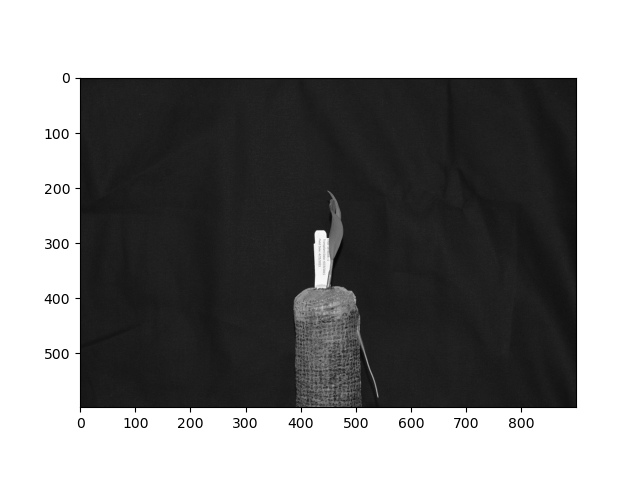

In [2]:
image = skio.imread("data/plant-seedling.jpg", as_gray = True)
plt.subplots()
plt.imshow(image, cmap="gray")

In [3]:
# create histogram
histogram, bin_edges = np.histogram(image, bins = 256, range=(0,1))

In [4]:
histogram

array([    0,     2,     1,     2,     5,    10,    13,    23,    47,
          56,    60,    49,    37,    40,    35,    46,    64,    95,
         253,   736,  1881,  3460,  6015,  9619, 13993, 19761, 27186,
       35472, 43080, 48784, 51650, 50969, 46629, 40120, 32480, 24979,
       18062, 12383,  8350,  5101,  3114,  1807,  1091,   651,   402,
         265,   189,   156,   125,   139,   147,   123,   132,   134,
         139,   148,   122,   131,   148,   173,   171,   175,   191,
         186,   192,   175,   186,   222,   202,   177,   238,   225,
         224,   262,   224,   256,   235,   259,   242,   269,   275,
         263,   282,   248,   256,   247,   274,   293,   282,   265,
         282,   303,   299,   247,   310,   326,   384,   309,   304,
         328,   336,   335,   345,   379,   322,   344,   363,   382,
         415,   391,   413,   402,   390,   362,   357,   376,   342,
         389,   319,   332,   312,   299,   296,   278,   289,   277,
         272,   269,

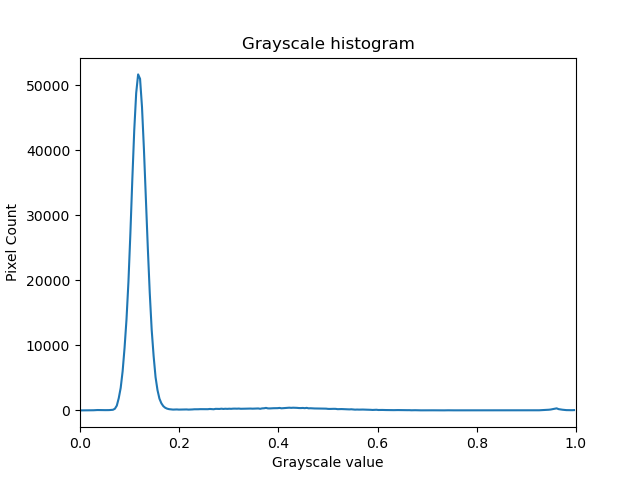

In [5]:
plt.figure()
plt.title("Grayscale histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Pixel Count")
plt.xlim([0.0,1.0])

plt.plot(bin_edges[0:-1], histogram)

The above figure shows you the histogram of bright values with a peak between 0.0 - 0.2 and then a small peak between 0.9-1.0.


In the histogram above, there are a large number of very dark pixels, as indicated in the chart by the spike around the grayscale value 0.12. This is because the original image has mostly a black background. 
#### Masks in Histogram
To focus specifically on a part of the image like the seedling we need to use masks.
The task is to hover over the plant seedling image with your mouse to determine the (x, y) coordinates of a bounding box around the leaf of the seedling. Then create a mask with a white rectangle covering that bounding box after which a histogram is plotted.

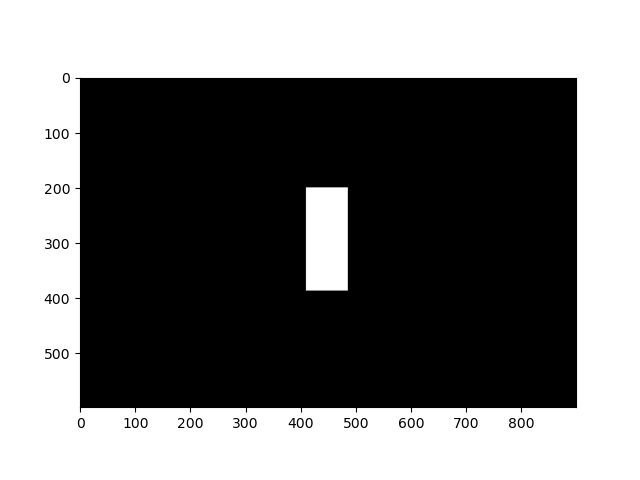

In [6]:
#create a mask
mask = np.zeros(shape=image.shape[0:2], dtype="bool") # creates a black background
import skimage.draw
rr, cc = skimage.draw.rectangle(start = (200, 410), end=(386, 485))
mask[rr,cc] = True # sets the box bounding the the leaf to white
image[mask] = True
plt.subplots()
plt.imshow(mask, cmap = "gray")

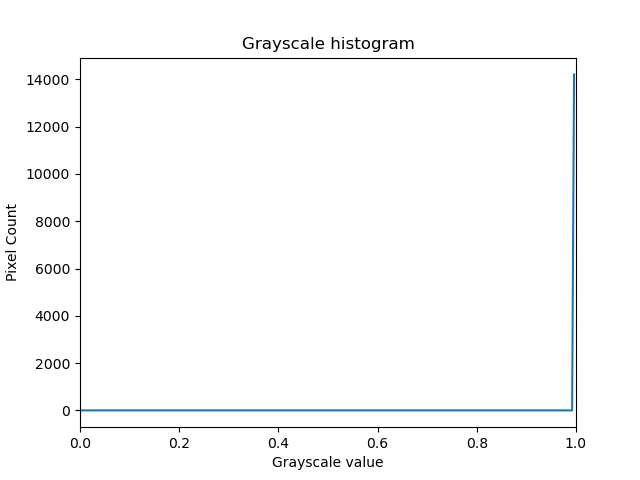

In [7]:
# create histogram
histogram, bin_edges = np.histogram(image[mask], bins = 256, range=(0,1))
plt.figure()
plt.title("Grayscale histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Pixel Count")
plt.xlim([0.0,1.0])

plt.plot(bin_edges[0:-1], histogram)

The above histogram has many peaks this is because relative proportion of bright pixels to dark pixels has grown.

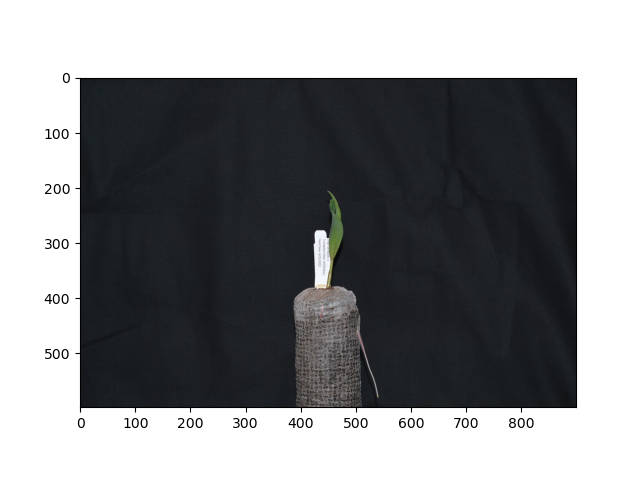

In [8]:
image = skio.imread("data/plant-seedling.jpg", as_gray = False)
plt.subplots()
plt.imshow(image)

## Colour Histograms

Enumerate through each of the channels and then plot the frequency count of each volour value.

Text(0, 0.5, 'Pixel Count')

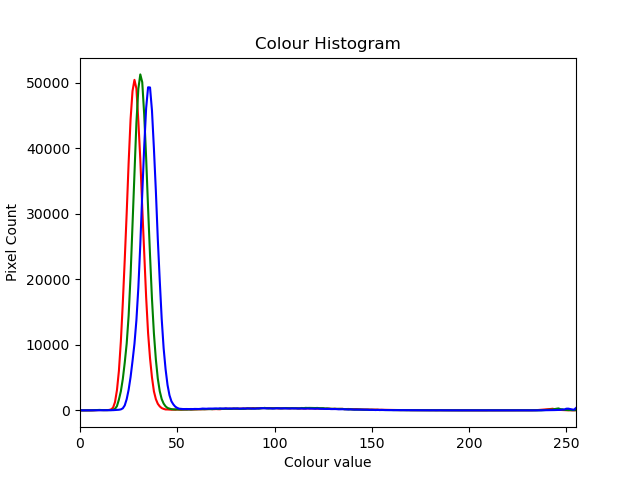

In [9]:
colors = ['red','green','blue']

plt.figure()
plt.xlim([0,255])

for channel_id, c in enumerate(colors):
    histogram, bin_edges = np.histogram(image[:,:,channel_id], bins = 256, range= (0,256))
    plt.plot(bin_edges[0:-1], histogram, color = c)

plt.title("Colour Histogram")
plt.xlabel("Colour value")
plt.ylabel("Pixel Count")

#### Colour histogram of well plate

We are interested in the colour histogram of one of the sensors in the well plate image, specifically, the seventh well from the left in the topmost row, which shows Erythrosin B reacting with water. Find the centre of that well and the radius (in pixels) of the well by hovering over the image with your mouse. Then create a circular mask to select only the desired well. Then, use that mask to apply the colour histogram operation to that well.

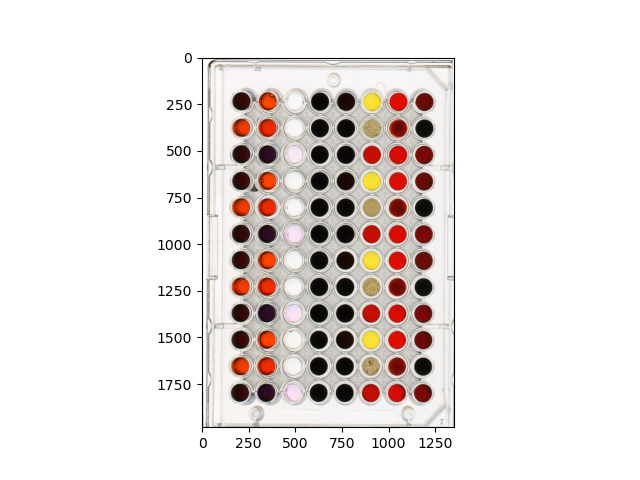

In [10]:
image = skio.imread("data/wellplate-02.tif")
plt.subplots()
plt.imshow(image)

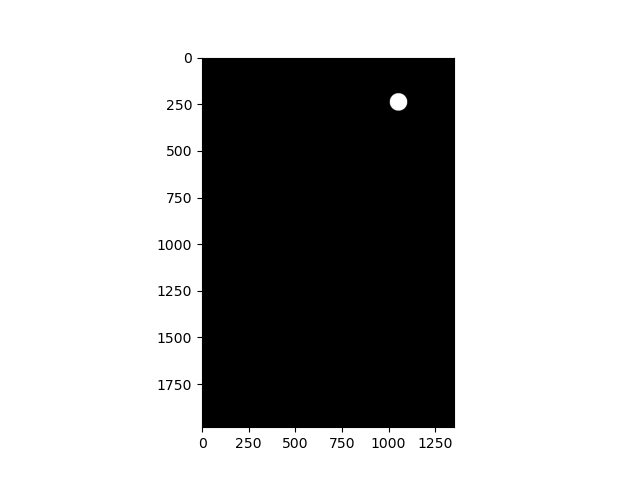

In [11]:
center = (1053, 240) #(x,y)
radius = 1100-1053
# The fourth dimension is alpha channel. It is used to set how opaque the image must be. 
#In this image the alpha is 255 everywhere, which means that the image is opaque throughout.
mask = np.zeros(shape=image.shape[0:2], dtype = "bool")
rr, cc = skimage.draw.disk((center[1], center[0]), radius)
mask[rr,cc] = True
plt.subplots()
plt.imshow(mask, cmap="gray")

Text(0, 0.5, 'Pixel Count')

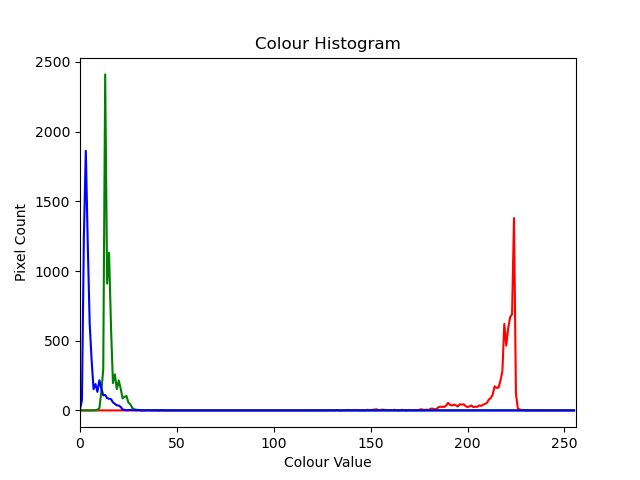

In [12]:
colors=["red","green","blue"]
plt.figure()
plt.xlim([0,256])
for channel_id, c in enumerate(colors):
    histogram, bin_edges = np.histogram(image[:,:,channel_id][mask], bins = 256, range = (0, 256))
    plt.plot(bin_edges[0:-1], histogram, color = c)
plt.title("Colour Histogram")
plt.xlabel("Colour Value")
plt.ylabel("Pixel Count")